# A simple C++ implementation of a convolutional neural network 

<p style="color:blue"><b><i> (Work in progress) </i></b></p>

## Introduction

Convolutional Neural Networks (CNNs) are among the most widely-used Deep Learning models. 
Their distinguishing feature is the presence of convolutional layers which make use of the translation invariance and locality properties of a problem to significantly reduce the number of parameters compared with dense layers with the same size, making them typically faster to train and more easily generalizable to unseen data.
Among their main domains of applications are image analysis tasks like object detection (they are important ingredients of real-time detection models like [YOLO](https://arxiv.org/pdf/2004.10934.pdf), [RetinaNet](https://www.paperswithcode.com/method/retinanet), and [SSD](https://link.springer.com/chapter/10.1007/978-3-319-46448-0_2)) and classification. 
Efficient implementations of CNNs running on either CPU or GPU are available in standard libraries like [TensorFlow](https://www.tensorflow.org/) and [PyTorch](https://pytorch.org/), making it straightforward to build, train, and test a network with just a few lines of code. 

However, using these libraries may not explain much of how CNNs work beyond the high-level description they provide. 
At least, that was my experience when starting to use them: thanks to the wealth of tutorials available online, I was soon able to build different CNNs, train them on several datasets, evaluate them and play with the parameters until I got something which worked well while minimizing the training time; however, I felt I did not really understand what a CNN really was. 
I was able to use it and understood the main steps—data acquisition, data cleaning feature engineering, hyperparameter selection through cross-validation, model training, and testing— and got a bird's eye view of the convolution, feedforward, and gradient descent algorithms, but I wanted to know more precisely what actually happened when data is fed to the CNN, why they are so efficient, and the reason for some of their limitations.

To me, the best way to understand something is to actually build it. 
So, to understand CNNs, I started to write a simple C++ implementation with handles to access it from Python and experiment with it. 
The present notebook shows some results of this experiment. 
While this implementation is, obviously, much less efficient than TensorFlow or PyTorch ones (in part because it does not optimise CPU usage and does not use the GPU at all), I hope its simplicity may help others who, like me when I started this project, feel intimidated by the complexity of these libraries' source code but want to get a deeper understanding of CNNs than simply using them can provide. 
If you are in this situation, I strongly encourage you to write your own implementation: writing code is often the best way to learn. 
Feel free to take inspiration from mine, copy the parts you like (but make sure you really understand them!), improve what you would like to be better, and add your own features. 
Many standard features like batch normalization and optimizers are not present in the current version of the code; implementing them would be a very good way for you to deepen your understanding! 
And if you don't have the time to write your own implementation (I know only too well that our time is often limited and one has to choose wisely what to devote it to), I hope the code I have written may still help you understand some of the inner workings of CNNs. 

In any case, if you have any questions, if something is not clear to you, or if you have spotted a mistake in the C++ code or this notebook, please feel free to reach out! 

## A few words on the implementation


## Example of use on the MNIST dataset

In this section we show how to use the CNN on the example of the MNIST dataset. 
We do not aim for efficiency here, and choose hyperparameters which demonstrate all the features of the implementation while keeping the resulting network relatively simple. 
In the next section, we will show how to tune the hyperparameters to optimise acuracy.

Our CNN implementation is found in the module `CNN3_cpp.so`. 
To use the MNIST dataset, we need to load the `mnist` module. 
We also load functions from the `numpy` and `os` modules we will use later, and the `pyplot` module to do plots.

In [1]:
import CNN3
import mnist 
from numpy import newaxis
from numpy.random import permutation as np_permutation
from os.path import exists
import matplotlib.pyplot as plt

We now define a few parameters. 
The string `save_file_name` is the name of the file in which the CNN will be saved. 

In [2]:
save_file_name = 'MNIST_CNN_1.cnn'

The following parameters relate to the training and testing phases:
* `n_train_images` (positive integer with maximum value 60000) is the number of train images,
* `n_test_images` (positive integer with maximum value 10000) is the number of test images,
* `n_epochs` (positive integer) is the number of epochs,
* `n_print` (positive integer) determines the frequency with which the accuracy is printed during training (it is printed every `n_print` steps),
* `learn_rate` (positive float) is the learning rate.

In [3]:
n_train_images = 60000
n_test_images = 10000
n_epochs = 10
n_print = 4000
learn_rate = 0.01

Next, we define the hyperparameters of the network: 
* `img_w` (positive integer): width of the input images,
* `img_h` (positive integer): height of the input images,
* `num_labels` (positive integer): the number of different labels,
* `CL_size_filters` (list of positive integers): filter sizes for the convolution layers,
* `CL_num_filters` (list of positive integers): umber of filters for the convolution layers,
* `MP_size` (list of positive integers): size of the maxpool layers
* `FC_size` (list of positive integers): number of neurons for the fully-connected layers, excluding the output layer, 
* `p_dropout`: the dropout probability.

The lists `CL_size_filters`, `CL_num_filters`, and `MP_size` must have the same size (equal to the number of convolution layers). 
The length of the list `FC_size` gives the number of fully-connected layers excluding the output layer. 
(The number of neurons in the output layer is equal to `num_labels`.)

Here we work with a CNN having 2 convolution layers and 2 fully-connected layers:

In [4]:
img_w = 28 # width of input images
img_h = 28 # height of input images
num_labels = 10 # number of possible labels
CL_size_filters = [3,3] # list of filter sizes for the convolution layers
CL_num_filters = [16,32] # number of filters for the convolution layers
MP_size = [2,2] # size of the maxpool layers
FC_size = [32] # number of neurons for the fully-connected layers (exclusing the output layer)
p_dropout = 0.2 # dropout probability

We now load the training and test images from the MNIST dataset and normalize them to have values between -0.5 and 0.5: 

In [5]:
# normalization function
def normalize(image):
    return image / 255 - 0.5

# training images and labels
train_images = normalize(mnist.train_images()[:n_train_images])
train_labels = mnist.train_labels()[:n_train_images]

# test images and labels
test_images = normalize(mnist.test_images()[:n_test_images])
test_labels = mnist.test_labels()[:n_test_images]

If no file with the name `save_file_name` exists, we build it and train it. 
If it exists, we skip this step. 

MNIST CNN initialized


— Start of training —

— Epoch 1 of 10 —

Step 4000 — average loss: 1.6116376798, accuracy: 41.250%
Step 8000 — average loss: 0.2977221664, accuracy: 91.000%
Step 12000 — average loss: 0.2005693184, accuracy: 94.575%
Step 16000 — average loss: 0.1608117628, accuracy: 94.750%
Step 20000 — average loss: 0.1295900408, accuracy: 95.900%
Step 24000 — average loss: 0.1093735968, accuracy: 96.625%
Step 28000 — average loss: 0.0982715505, accuracy: 96.975%
Step 32000 — average loss: 0.1037220603, accuracy: 96.775%
Step 36000 — average loss: 0.1189947530, accuracy: 96.375%
Step 40000 — average loss: 0.0831808534, accuracy: 97.525%
Step 44000 — average loss: 0.0884403634, accuracy: 97.575%
Step 48000 — average loss: 0.0894561769, accuracy: 97.300%
Step 52000 — average loss: 0.0773459301, accuracy: 97.800%
Step 56000 — average loss: 0.0853091692, accuracy: 97.300%
Step 60000 — average loss: 0.0913815525, accuracy: 96.975%

— Epoch 2 of 10 —

Step 4000 — average loss: 0.062

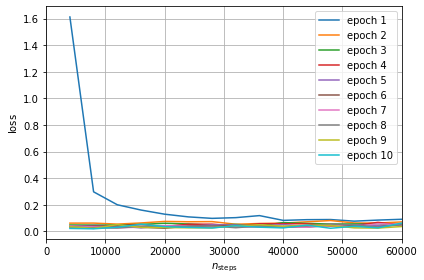

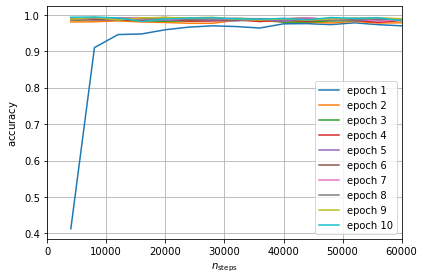

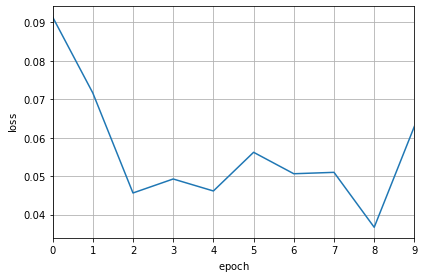

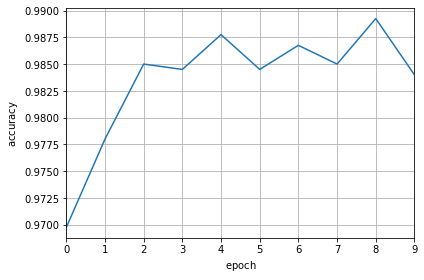

In [6]:
if not exists(save_file_name):

    # build the CNN 
    CNN = CNN3.CNN3(img_w, img_h, 1, CL_size_filters, CL_num_filters, MP_size, FC_size, num_labels)

    print('MNIST CNN initialized') 

    # train the CNN

    # number of steps elapsed 
    nsteps_l = []
    # loss function
    loss_l = []
    # accuracy
    acc_l = []

    print('\n\n— Start of training —')
    for epoch in range(n_epochs):
        nsteps_l.append([])
        loss_l.append([])
        acc_l.append([])
        print('\n— Epoch {:d} of {:d} —\n'.format(epoch+1, n_epochs))

        # shuffle the training data
        permutation = np_permutation(len(train_images))
        train_images = train_images[permutation]
        train_labels = train_labels[permutation]

        # set the loss and number of correctly predicted labels to 0
        loss = 0.
        num_correct = 0

        # for each image in the training set, train the CNN and update the loss and number of correctly-predicted labels
        for i, (im, label) in enumerate(zip(train_images, train_labels)): 
            results = CNN.train(train_images[i][newaxis,:], int(train_labels[i]), learn_rate, p_dropout)
            loss += results[0]
            num_correct += results[1]
            # if i is a multiple of n_print, print the loss and accuracy            
            if i % n_print == n_print - 1:
                nsteps_l[-1].append(i)
                loss_l[-1].append(loss / n_print)
                acc_l[-1].append(num_correct / n_print)
                print('Step {:d} — average loss: {:.10f}, accuracy: {:.3f}%'.format(i+1, loss/n_print, num_correct*100./n_print))
                # reset the loss and number of correctly-preducted labels
                loss = 0.
                num_correct = 0

    # save the CNN
    CNN.save(save_file_name)

    # plot the evolution of the loss function
    for e in range(n_epochs):
        plt.plot(nsteps_l[e], loss_l[e], label='epoch {:d}'.format(e+1))
    plt.xlim(0, n_train_images)
    plt.xlabel(r'$n_{\mathrm{steps}}$')
    plt.ylabel(r'$\mathrm{loss}$')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

    # plot the evolution of the accuracy
    for e in range(n_epochs):
        plt.plot(nsteps_l[e], acc_l[e], label='epoch {:d}'.format(e+1))
    plt.xlim(0, n_train_images)
    plt.xlabel(r'$n_{\mathrm{steps}}$')
    plt.ylabel(r'$\mathrm{accuracy}$')
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # plot the evolution of the loss function - epoch to epoch
    plt.plot(range(n_epochs), [l[-1] for l in loss_l])
    plt.xlim(0, n_epochs-1)
    plt.xlabel(r'$\mathrm{epoch}$')
    plt.ylabel(r'$\mathrm{loss}$')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # plot the evolution of the accuracy  - epoch to epoch
    plt.plot(range(n_epochs), [l[-1] for l in acc_l])
    plt.xlim(0, n_epochs-1)
    plt.xlabel(r'$\mathrm{epoch}$')
    plt.ylabel(r'$\mathrm{accuracy}$')
    plt.grid()
    plt.tight_layout()
    plt.show()

Notice that the accuracy seems to keep increasing. 
The results are thus not expected to be optimal. 

We then load the CNN:

In [7]:
CNN = CNN3.CNN3()
CNN.load(save_file_name)

We then test the CNN on the training set and print the loss and accuracy:

In [8]:
print('\n\n— Testing the CNN —\n')
loss = 0.
num_correct = 0
for i, (im, label) in enumerate(zip(test_images, test_labels)):
    results = CNN.forward_la(im[newaxis,:], int(label))
    loss += results[0]
    num_correct += results[1]
print('Test Loss:', loss / n_test_images)
print('Test Accuracy:', num_correct / n_test_images)



— Testing the CNN —

Test Loss: 0.05482826454899335
Test Accuracy: 0.9853


The accuracy is larger than 98%, which seems decent. 
Let us further train the model to see if the accuracy improves:



— Start of training —

— Epoch 1 of 10 —

Step 4000 — average loss: 0.0329964570, accuracy: 99.025%
Step 8000 — average loss: 0.0257882703, accuracy: 99.400%
Step 12000 — average loss: 0.0376619672, accuracy: 98.875%
Step 16000 — average loss: 0.0308924644, accuracy: 99.125%
Step 20000 — average loss: 0.0382448735, accuracy: 98.850%
Step 24000 — average loss: 0.0373101838, accuracy: 98.900%
Step 28000 — average loss: 0.0494867794, accuracy: 98.775%
Step 32000 — average loss: 0.0359165602, accuracy: 98.850%
Step 36000 — average loss: 0.0271949937, accuracy: 99.300%
Step 40000 — average loss: 0.0297328027, accuracy: 99.100%
Step 44000 — average loss: 0.0397303551, accuracy: 98.900%
Step 48000 — average loss: 0.0460951314, accuracy: 98.550%
Step 52000 — average loss: 0.0519758945, accuracy: 98.625%
Step 56000 — average loss: 0.0500076383, accuracy: 98.300%
Step 60000 — average loss: 0.0311578177, accuracy: 99.175%

— Epoch 2 of 10 —

Step 4000 — average loss: 0.0279797431, accuracy: 99.

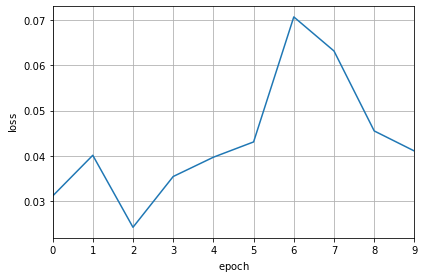

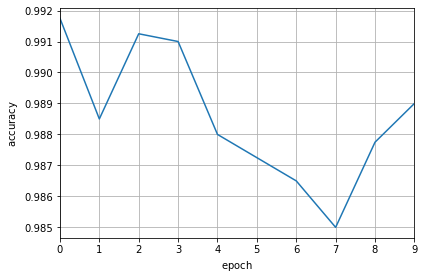



— Testing the CNN —

Test Loss: 0.10220539360553002
Test Accuracy: 0.9841


In [9]:
# number of epochs
n_epochs = 10

# learning rate
learn_rate = 0.01

# number of steps elapsed 
nsteps_l = []
# loss function
loss_l = []
# accuracy
acc_l = []

print('\n\n— Start of training —')
for epoch in range(n_epochs):
    nsteps_l.append([])
    loss_l.append([])
    acc_l.append([])
    print('\n— Epoch {:d} of {:d} —\n'.format(epoch+1, n_epochs))

    # shuffle the training data
    permutation = np_permutation(len(train_images))
    train_images = train_images[permutation]
    train_labels = train_labels[permutation]

    # set the loss and number of correctly predicted labels to 0
    loss = 0.
    num_correct = 0

    # for each image in the training set, train the CNN and update the loss and number of correctly-predicted labels
    for i, (im, label) in enumerate(zip(train_images, train_labels)): 
        results = CNN.train(train_images[i][newaxis,:], int(train_labels[i]), learn_rate, p_dropout)
        loss += results[0]
        num_correct += results[1]
        # if i is a multiple of n_print, print the loss and accuracy            
        if i % n_print == n_print - 1:
            nsteps_l[-1].append(i)
            loss_l[-1].append(loss / n_print)
            acc_l[-1].append(num_correct / n_print)
            print('Step {:d} — average loss: {:.10f}, accuracy: {:.3f}%'.format(i+1, loss/n_print, num_correct*100./n_print))
            # reset the loss and number of correctly-preducted labels
            loss = 0.
            num_correct = 0

# plot the evolution of the loss function - epoch to epoch
plt.plot(range(n_epochs), [l[-1] for l in loss_l])
plt.xlim(0, n_epochs-1)
plt.xlabel(r'$\mathrm{epoch}$')
plt.ylabel(r'$\mathrm{loss}$')
plt.grid()
plt.tight_layout()
plt.show()

# plot the evolution of the accuracy  - epoch to epoch
plt.plot(range(n_epochs), [l[-1] for l in acc_l])
plt.xlim(0, n_epochs-1)
plt.xlabel(r'$\mathrm{epoch}$')
plt.ylabel(r'$\mathrm{accuracy}$')
plt.grid()
plt.tight_layout()
plt.show()

# test the CNN
print('\n\n— Testing the CNN —\n')
loss = 0.
num_correct = 0
for i, (im, label) in enumerate(zip(test_images, test_labels)):
    results = CNN.forward_la(im[newaxis,:], int(label))
    loss += results[0]
    num_correct += results[1]
print('Test Loss:', loss / n_test_images)
print('Test Accuracy:', num_correct / n_test_images)

The accuracy has not changed significantly, and the loss has actually gone higher. 
This indicates that the model has learned essentially as well as it can. 
It may, however, be possible to reach higher performance using a smaller learning rate.

Let us check that by dividing the learning rate by 10. 



— Start of training —

— Epoch 1 of 10 —

Step 4000 — average loss: 0.0209146969, accuracy: 99.275%
Step 8000 — average loss: 0.0125879608, accuracy: 99.600%
Step 12000 — average loss: 0.0188403229, accuracy: 99.425%
Step 16000 — average loss: 0.0151204453, accuracy: 99.525%
Step 20000 — average loss: 0.0120181680, accuracy: 99.575%
Step 24000 — average loss: 0.0076266247, accuracy: 99.800%
Step 28000 — average loss: 0.0054734575, accuracy: 99.850%
Step 32000 — average loss: 0.0109066172, accuracy: 99.675%
Step 36000 — average loss: 0.0138123578, accuracy: 99.650%
Step 40000 — average loss: 0.0103960318, accuracy: 99.600%
Step 44000 — average loss: 0.0101628108, accuracy: 99.700%
Step 48000 — average loss: 0.0091452363, accuracy: 99.650%
Step 52000 — average loss: 0.0109411889, accuracy: 99.675%
Step 56000 — average loss: 0.0093542019, accuracy: 99.600%
Step 60000 — average loss: 0.0097499857, accuracy: 99.600%

— Epoch 2 of 10 —

Step 4000 — average loss: 0.0042524559, accuracy: 99.

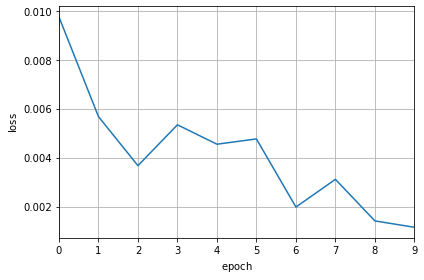

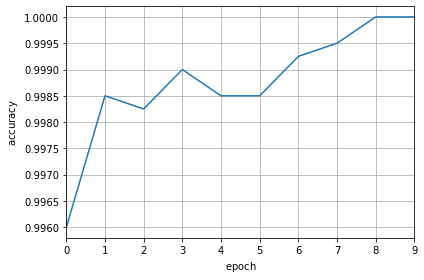



— Testing the CNN —

Test Loss: 0.030801894501261615
Test Accuracy: 0.9925


In [10]:
# re-load the previous CNN
CNN.load(save_file_name)

# number of epochs
n_epochs = 10

# learning rate
learn_rate = 0.001

# number of steps elapsed 
nsteps_l = []
# loss function
loss_l = []
# accuracy
acc_l = []

print('\n\n— Start of training —')
for epoch in range(n_epochs):
    nsteps_l.append([])
    loss_l.append([])
    acc_l.append([])
    print('\n— Epoch {:d} of {:d} —\n'.format(epoch+1, n_epochs))

    # shuffle the training data
    permutation = np_permutation(len(train_images))
    train_images = train_images[permutation]
    train_labels = train_labels[permutation]

    # set the loss and number of correctly predicted labels to 0
    loss = 0.
    num_correct = 0

    # for each image in the training set, train the CNN and update the loss and number of correctly-predicted labels
    for i, (im, label) in enumerate(zip(train_images, train_labels)): 
        results = CNN.train(train_images[i][newaxis,:], int(train_labels[i]), learn_rate, p_dropout)
        loss += results[0]
        num_correct += results[1]
        # if i is a multiple of n_print, print the loss and accuracy            
        if i % n_print == n_print - 1:
            nsteps_l[-1].append(i)
            loss_l[-1].append(loss / n_print)
            acc_l[-1].append(num_correct / n_print)
            print('Step {:d} — average loss: {:.10f}, accuracy: {:.3f}%'.format(i+1, loss/n_print, num_correct*100./n_print))
            # reset the loss and number of correctly-preducted labels
            loss = 0.
            num_correct = 0

# plot the evolution of the loss function - epoch to epoch
plt.plot(range(n_epochs), [l[-1] for l in loss_l])
plt.xlim(0, n_epochs-1)
plt.xlabel(r'$\mathrm{epoch}$')
plt.ylabel(r'$\mathrm{loss}$')
plt.grid()
plt.tight_layout()
plt.show()

# plot the evolution of the accuracy  - epoch to epoch
plt.plot(range(n_epochs), [l[-1] for l in acc_l])
plt.xlim(0, n_epochs-1)
plt.xlabel(r'$\mathrm{epoch}$')
plt.ylabel(r'$\mathrm{accuracy}$')
plt.grid()
plt.tight_layout()
plt.show()

# test the CNN
print('\n\n— Testing the CNN —\n')
loss = 0.
num_correct = 0
for i, (im, label) in enumerate(zip(test_images, test_labels)):
    results = CNN.forward_la(im[newaxis,:], int(label))
    loss += results[0]
    num_correct += results[1]
print('Test Loss:', loss / n_test_images)
print('Test Accuracy:', num_correct / n_test_images)

The test accuracy is now above 99%. 
The test loss is an order of magnitude above the train loss, suggesting that the model overfits the training data can not be significantly improved further by simply training on more epochs.

## Performance

### Choice of hyperparameters

Let us now try to change some of the hyperparameters of the model, like the number of layers, neurons, and the size of filters, to see their effects. 
Proper hyperparameter optimization would require following the validation accuracy to ensure the models are trained over enough epochs and possibly add batch normalization and a learning rate optimizer, which we do not include here to keep the model as simple as possible. 
More modestly, our aim is to compare a few sets of parameters and look, on specific examples, at the effects of changing one of them. 
The results shown below should thus be seen as illustrations, which could be a first step to a more precise study.

We first define a function training a model over 20 epochs, the last 10 ones being performed with a learning rate divided by 10, and returning the test accuracy.

In [5]:
def test_params(CNN_params, n_epochs, learn_rate, p_dropout,
               train_images, train_labels, test_images, test_labels):

    # build the CNN 
    CNN = CNN3.CNN3(*CNN_params)

    # train the CNN
    for epoch in range(n_epochs):

        # shuffle the training data
        permutation = np_permutation(len(train_images))
        train_images = train_images[permutation]
        train_labels = train_labels[permutation]

        # train the CNN for each image in the training set
        for i, (im, label) in enumerate(zip(train_images, train_labels)): 
            CNN.train(train_images[i][newaxis,:], int(train_labels[i]), learn_rate, p_dropout)
    
    # divide the learning rate by 10
    learn_rate /= 10
    
    # train the CNN
    for epoch in range(n_epochs):

        # shuffle the training data
        permutation = np_permutation(len(train_images))
        train_images = train_images[permutation]
        train_labels = train_labels[permutation]

        # train the CNN for each image in the training set
        for i, (im, label) in enumerate(zip(train_images, train_labels)): 
            CNN.train(train_images[i][newaxis,:], int(train_labels[i]), learn_rate, p_dropout)

    # test the CNN
    num_correct = 0
    for i, (im, label) in enumerate(zip(test_images, test_labels)):
        results = CNN.forward_la(im[newaxis,:], int(label))
        num_correct += results[1]

    return num_correct / len(test_images)

Let us first define the parameters common to all the networks:

In [6]:
n_train_images = 60000
n_test_images = 10000
n_epochs = 10
n_print = 4000
learn_rate = 0.01
img_w = 28 
img_h = 28 
num_labels = 10 
p_dropout = 0.2 
MP_size = [2,2] 

# normalization function
def normalize(image):
    return image / 255 - 0.5

# training images and labels
train_images = normalize(mnist.train_images()[:n_train_images])
train_labels = mnist.train_labels()[:n_train_images]

# test images and labels
test_images = normalize(mnist.test_images()[:n_test_images])
test_labels = mnist.test_labels()[:n_test_images]

We now define a function taking as parameters the lists of fiter sizes, numbers of filters, and numbers of neurons in the fully-connected layer and training the corresponding network:

In [7]:
def test_network(CL_size_filters, CL_num_filters, FC_size):
    CNN_params = [img_w, img_h, 1, CL_size_filters, CL_num_filters, MP_size, FC_size, num_labels]
    return test_params(CNN_params, n_epochs, learn_rate, p_dropout,
               train_images, train_labels, test_images, test_labels)

We first perform a test with a small number of filters and no dense layer:

In [8]:
CL_size_filters = [3,3] 
CL_num_filters = [1,2] 
FC_size = [] 
accuracy = test_network(CL_size_filters, CL_num_filters, FC_size)
print('Accuracy: ' + str(accuracy))

Accuracy: 0.9292


The accuracy is close to 93%.
Let us add a dense layer with 32 neurons, like in the previous section:

In [7]:
CL_size_filters = [3,3] 
CL_num_filters = [1,2] 
FC_size = [32] 
accuracy = test_network(CL_size_filters, CL_num_filters, FC_size)
print('Accuracy: ' + str(accuracy))

Accuracy: 0.9627


The accuracy has increased to 96%. 
The dense layer thus seems to help with the learning, although the reduced number of filters still hampers it.
Let us multiply by 4 the number of filters in each layer: 

In [8]:
CL_size_filters = [3,3] 
CL_num_filters = [4,8] 
FC_size = [32] 
accuracy = test_network(CL_size_filters, CL_num_filters, FC_size)
print('Accuracy: ' + str(accuracy))

Accuracy: 0.9874


The accuracy is close to 98.7%. 
It seems that (as one could expect), increasing the number of filters leads to better results. 

Let us now try with only one convolution layer with the same total number of filters (the following cell takes much longer to run than the previous ones):

In [8]:
CL_size_filters = [3] 
CL_num_filters = [12] 
FC_size = [32] 
accuracy = test_network(CL_size_filters, CL_num_filters, FC_size)
print('Accuracy: ' + str(accuracy))

Accuracy: 0.9855


The accuracy is close to 98.6%, a bit lower than the previous one. 
While the difference in accuracy is not sinificant, this network took significantly longer (by a factor larger than 2) to train than the previous one. 
This illustrates the well-known fact that, typically, “deep” neural networks (with many layers) tend to be more efficient than “wide” ones (with less layers but more neurons per layer) for a given number of connections. 
(Although the above experiment is not exactly an apple-to-apple comparison because the image size is reduced between two convolution layers.)

Let us now look at the effect of the dense layer. 
We first try to reduce the number of neurons:

In [8]:
CL_size_filters = [3,3] 
CL_num_filters = [4,8] 
FC_size = [16]
accuracy = test_network(CL_size_filters, CL_num_filters, FC_size)
print('Accuracy: ' + str(accuracy))

Accuracy: 0.9861


The accuracy is very close to the one we got with 32 neurons, which suggests that, for this number and size of convolution filters, a dense layer with 16 neurons is large enough. 

Let us now try with no dense layer at all:

In [10]:
CL_size_filters = [3,3] 
CL_num_filters = [4,8] 
FC_size = []
accuracy = test_network(CL_size_filters, CL_num_filters, FC_size)
print('Accuracy: ' + str(accuracy))

Accuracy: 0.9853


The accuracy is very close to the previous one, confirming that the dense layer does not play an important role.

Let us finally briefly look at the effect of the filter size by increasing it to 5:  

In [8]:
CL_size_filters = [5,5] 
CL_num_filters = [4,8] 
FC_size = [16]
accuracy = test_network(CL_size_filters, CL_num_filters, FC_size)
print('Accuracy: ' + str(accuracy))

Accuracy: 0.988


The accuracy is slightly above the one obtained with smaller filters. 
Increasing the filter size thus seems to help a little, but increasing the number of filters is more advantageous.

All in all, the main observation from these experiments is that changing the hyperparameters does not affect the resulting accuracy very much: all the models we have tried in this section have an accuracy between 92.9% (with all models escept the simplest one exceeding 95%) and 99%. 
The reason is that the problem we are testing them on, handwritten digits classification on the MNIST dataset, is a relatively simple one, as the different classes can be separated by detecting some simple featurs such as straight or curved lines and the images are of relatively good quality. Therefore, even very simple models with only a few filters and neurons perform decently well. More complex models are required when trying to increase the accuracy above 99%, as such a model needs to classify correctly even the few “hard” images where these features may not be as clear cut, when working on more complex problems such as blood cell classification, or when the dataset has more noise.

### Comparison with a TensorFlow implementation

Let us compare the accuracy of our model with a simple CNN built using the Keras library with the TensorFlow backend.

In [6]:
# import the keras library
import keras
from numpy import array

# define the model
model = keras.Sequential(
    [
        keras.layers.Conv2D(16, 3, activation='relu', input_shape = (28,28,1)), # convolution layer
        keras.layers.MaxPooling2D(pool_size=(2, 2)), # MaxPool layer
        keras.layers.Conv2D(32, 3, activation='relu'), # convolution layer
        keras.layers.MaxPooling2D(pool_size=(2, 2)), # MaxPool layer
        keras.layers.Flatten(), # flatten the output
        keras.layers.Dense(32, activation='relu'), # dense layer
        keras.layers.Dropout(0.2), # dropout layer
        keras.layers.Dense(10, activation='softmax') # output layer
    ]
)

# compile the model
model.compile(
    optimizer=keras.optimizers.Adam(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.categorical_crossentropy,
    # List of metrics to monitor
    metrics=['accuracy'],
)

# print a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0

Let us train the model on 30 epochs:

In [7]:
# fit the model on the training images after converting the labels to 
# one-hot format

def to_one_hot(l):
    res = [[0 for i in range(10)] for _ in l]
    for i, j in enumerate(l):
        res[i][j] = 1
    return array(res)

# the newaxis is needed as Keras uses four-dimensional arrays as input
model.fit(train_images[:,:,:,newaxis], to_one_hot(train_labels), epochs=30)

Epoch 1/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2984 - accuracy: 0.9075
Epoch 2/30
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1031 - accuracy: 0.9688
Epoch 3/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0763 - accuracy: 0.9779
Epoch 4/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0628 - accuracy: 0.9808
Epoch 5/30
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0541 - accuracy: 0.9829
Epoch 6/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0472 - accuracy: 0.9853
Epoch 7/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0411 - accuracy: 0.9872
Epoch 8/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0372 - accuracy: 0.9878
Epoch 9/30
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0319 - accuracy: 0.9898
Epoch 10/30
1875/1875 [==============================] - 16s 8ms/step - l

Let us test the model:

In [8]:
results = model.evaluate(test_images[:,:,:,newaxis], to_one_hot(test_labels))
print('test loss, test accuracy:', results)

313/313 [==============================] - 1s 3ms/step - loss: 0.0468 - accuracy: 0.9912
test loss, test accuracy: [0.04680200666189194, 0.9911999702453613]


The accuracy is slightly above 99%, which is close to what we obtained with the previous model. 
(This is not surprizing as the models are essentially the same. 
The main difference is that this implementation uses an optimizer which automatically adjusts the learning rate during the training, while we had to to it manually on the custom implementation.)

This implementation is typically faster to train (by how much depends on the hardware). 
This is because TensorFlow makes use of many optimisations, including (but surely not limited to) a better use of multi-core architectures and of the GPU if set-up to run on it. 
(Running a large model is generally much more efficient on a GPU than a CPU, because many operations can be performed in parallel, making full use of the GPU architecture. 
However, since the model we run here is relatively small, with only a few tens of thousands of parameters, running it on a CPU or GPU should not make a huge difference. 
Which one is more efficient depends, of course, of the specific CPU and GPU.)

## Conclusion

## Appendix: The implementation

### Structure

### Convolutional layer

### ReLU layer

### Maxpool layer

### Fully-connected layer

### Softmax activation function